In [149]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical


In [150]:
from svm import *
from svmutil import *
import numpy as np

In [151]:
#y, x = svm_read_problem('../heart_scale')

In [152]:
y, x = svm_read_problem('data')
logging.debug("Length of label: {}".format(len(y)))
logging.debug("Label: {}".format(y))
logging.debug("Length of data: {}".format(len(x)))
logging.debug("Data: {}".format(x))

Length of label: 63
Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Length of data: 63
Data: [{1: 0.202, 2: 0.454}, {1: 0.27, 2: 0.374}, {1: 0.276, 2: 0.304}, {1: 0.276, 2: 0.268}, {1: 0.278, 2: 0.218}, {1: 0.378, 2: 0.18}, {1: 0.412, 2: 0.226}, {1: 0.382, 2: 0.332}, {1: 0.368, 2: 0.284}, {1: 0.326, 2: 0.38}, {1: 0.3, 2: 0.514}, {1: 0.142, 2: 0.426}, {1: 0.21, 2: 0.294}, {1: 0.202, 2: 0.246}, {1: 0.308, 2: 0.17}, {1: 0.496, 2: 0.18}, {1: 0.424, 2: 0.254}, {1: 0.342, 2: 0.24}, {1: 0.314, 2: 0.306}, {1: 0.304, 2: 0.432}, {1: 0.216, 2: 0.38}, {1: 0.274, 2: 0.448}, {1: 0.636, 2: 0.366}, {1: 0.514, 2: 0.272}, {1: 0.48, 2: 0.346}, {1: 0.476, 2: 0.41}, {1: 0.564, 2: 0.354}, {1: 0.412, 2: 0.404}, {1: 0.616, 2: 0.832}, {1: 0

In [153]:
logging.debug("Length of Data: {}, Dimension of Data: {}".format(len(x), len(x[0])))
data = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) for dim_idx, feat_idx in enumerate(data_list)]).reshape(len(x), len(x[0]))
logging.debug("Data Source:\n{}".format(x))
logging.debug("Data Array:\n{}".format(data))

Length of Data: 63, Dimension of Data: 2
Data Source:
[{1: 0.202, 2: 0.454}, {1: 0.27, 2: 0.374}, {1: 0.276, 2: 0.304}, {1: 0.276, 2: 0.268}, {1: 0.278, 2: 0.218}, {1: 0.378, 2: 0.18}, {1: 0.412, 2: 0.226}, {1: 0.382, 2: 0.332}, {1: 0.368, 2: 0.284}, {1: 0.326, 2: 0.38}, {1: 0.3, 2: 0.514}, {1: 0.142, 2: 0.426}, {1: 0.21, 2: 0.294}, {1: 0.202, 2: 0.246}, {1: 0.308, 2: 0.17}, {1: 0.496, 2: 0.18}, {1: 0.424, 2: 0.254}, {1: 0.342, 2: 0.24}, {1: 0.314, 2: 0.306}, {1: 0.304, 2: 0.432}, {1: 0.216, 2: 0.38}, {1: 0.274, 2: 0.448}, {1: 0.636, 2: 0.366}, {1: 0.514, 2: 0.272}, {1: 0.48, 2: 0.346}, {1: 0.476, 2: 0.41}, {1: 0.564, 2: 0.354}, {1: 0.412, 2: 0.404}, {1: 0.616, 2: 0.832}, {1: 0.576, 2: 0.74}, {1: 0.612, 2: 0.678}, {1: 0.706, 2: 0.62}, {1: 0.758, 2: 0.654}, {1: 0.768, 2: 0.702}, {1: 0.716, 2: 0.708}, {1: 0.638, 2: 0.758}, {1: 0.494, 2: 0.806}, {1: 0.554, 2: 0.694}, {1: 0.584, 2: 0.628}, {1: 0.64, 2: 0.58}, {1: 0.718, 2: 0.536}, {1: 0.852, 2: 0.55}, {1: 0.788, 2: 0.618}, {1: 0.738, 2: 0.

In [154]:
model = svm_train(y[:200], x[:200], '-s 0 -t 0 -c 100')
#p_label, p_acc, p_val = svm_predict(y[200:], x[200:], model)
# using the same data set as training, just for development stage
p_label, p_acc, p_val = svm_predict(y[:200], x[:200], model)
logging.debug("Accuracy: {}".format(p_acc))
logging.debug("Output Label: {}".format(p_label))
logging.debug("Model Value: {}".format(p_val))

yi =np.array([1 if val > 0 else -1 for [val] in p_val])
logging.debug("Yi(+1/-1): {}".format(yi))

Accuracy: (100.0, 0.0, 1.0)
Output Label: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
Model Value: [[2.5491793128882847], [3.281507873088355], [4.281332006939735], [4.816235397282011], [5.545734842152676], [5.439258557277878], [4.527598071560256], [3.153933714623271], [3.96109174931269], [2.816543251099109], [0.9999990626864736], [3.367873201296156], [4.872839991990624], [5.639732234865871], [6.057610403538206], [4.647364651599293], [4.031030517665712], [4.789347657592398], [3.9965984704310067], [2.191546257256647], [3.554749434358804], [2.1551403761753427], [0.9441619925003586], [3.1595919452821057], [2.2882411298588003], [1.364145630459749], [1.6056526243844225], [1.8827979748678878], [-5.845645920882969], [-4.210231

Accuracy = 100% (63/63) (classification)


In [155]:
svm_type = model.get_svm_type()
logging.debug("SVM Type: {}".format(svm_type))

nr_class = model.get_nr_class()
logging.debug("Number of Class: {}".format(nr_class))

svr_probability = model.get_svr_probability()
logging.debug("SVM Probability: {}".format(svr_probability))

class_labels = model.get_labels()
logging.debug("Class Labels: {}".format(class_labels))

sv_indices = model.get_sv_indices()
logging.debug("Support Vectors Indices: {}".format(sv_indices))

nr_sv = model.get_nr_sv()
logging.debug("Number of Support Vectors: {}".format(nr_sv))

is_prob_model = model.is_probability_model()
logging.debug("Is Probability Model: {}".format(is_prob_model))

support_vector_coefficients = model.get_sv_coef()
logging.debug("Support Vector Coefficients: {}".format(support_vector_coefficients))

support_vectors = model.get_SV()
logging.debug("Support Vectors: {}".format(support_vectors))

SVM Type: 0
Number of Class: 2
SVM Probability: 0.0
Class Labels: [2, 3]
Support Vectors Indices: [11, 23, 50, 60]
Number of Support Vectors: 4
Is Probability Model: False
Support Vector Coefficients: [(46.92348202967111,), (100.0,), (-46.92348202967113,), (-100.0,)]
Support Vectors: [{1: 0.3, 2: 0.514}, {1: 0.636, 2: 0.366}, {1: 0.784, 2: 0.43}, {1: 0.476, 2: 0.554}]


In [156]:
for sv_idx, data_idx in enumerate(sv_indices):
    logging.debug("Support Vector Indices: {}, Data Indices: {}".format(sv_idx, data_idx))
    logging.debug("Support Vectors from SV: {}, Support Vectors Coeff: {}, Support Vectors from Data: {}, Yi: {}, Model Output: {}".format(
        support_vectors[sv_idx], support_vector_coefficients[sv_idx], x[data_idx-1], yi[data_idx-1], p_val[data_idx-1]))
    
for i in support_vectors:
    logging.debug("Support Vectors from SV: {}".format(i))

for i in support_vector_coefficients:
    logging.debug("Support Vectors Coeff: {}".format(i))

Support Vector Indices: 0, Data Indices: 11
Support Vectors from SV: {1: 0.3, 2: 0.514}, Support Vectors Coeff: (46.92348202967111,), Support Vectors from Data: {1: 0.3, 2: 0.514}, Yi: 1, Model Output: [0.9999990626864736]
Support Vector Indices: 1, Data Indices: 23
Support Vectors from SV: {1: 0.636, 2: 0.366}, Support Vectors Coeff: (100.0,), Support Vectors from Data: {1: 0.636, 2: 0.366}, Yi: 1, Model Output: [0.9441619925003586]
Support Vector Indices: 2, Data Indices: 50
Support Vectors from SV: {1: 0.784, 2: 0.43}, Support Vectors Coeff: (-46.92348202967113,), Support Vectors from Data: {1: 0.784, 2: 0.43}, Yi: -1, Model Output: [-1.000000232857527]
Support Vector Indices: 3, Data Indices: 60
Support Vectors from SV: {1: 0.476, 2: 0.554}, Support Vectors Coeff: (-100.0,), Support Vectors from Data: {1: 0.476, 2: 0.554}, Yi: -1, Model Output: [-0.7754679309093468]
Support Vectors from SV: {1: 0.3, 2: 0.514}
Support Vectors from SV: {1: 0.636, 2: 0.366}
Support Vectors from SV: {1

In [157]:
w1, w2 = 0.0, 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    w1 = w1 + support_vector_coefficients[sv_idx][0]*yi[data_idx-1]*x[data_idx-1][1]
    w2 = w2 + support_vector_coefficients[sv_idx][0]*yi[data_idx-1]*x[data_idx-1][2]
logging.debug("W: {}, {}".format(w1, w2))
print(w1, w2)

w0 = 0.0
for sv_idx, data_idx in enumerate(sv_indices):
    w0 = w0 + yi[data_idx-1] - (w1*support_vectors[sv_idx][1]+w2*support_vectors[sv_idx][2])
    #print(yi[data_idx-1] - (w1*x[data_idx-1][1]+w2*x[data_idx-1][2]))
    #print(yi[data_idx-1] - (w1*support_vectors[sv_idx][1]+w2*support_vectors[sv_idx][2]))
w0 = w0 / nr_sv
logging.debug("w0 = {}".format(w0))

W: 162.0650545201635, 136.29576703600955
w0 = -152.48754237035018


162.0650545201635 136.29576703600955


[0.202 0.27  0.276 0.276 0.278 0.378 0.412 0.382 0.368 0.326 0.3   0.142
 0.21  0.202 0.308 0.496 0.424 0.342 0.314 0.304 0.216 0.274 0.636 0.514
 0.48  0.476 0.564 0.412]
[0.454 0.374 0.304 0.268 0.218 0.18  0.226 0.332 0.284 0.38  0.514 0.426
 0.294 0.246 0.17  0.18  0.254 0.24  0.306 0.432 0.38  0.448 0.366 0.272
 0.346 0.41  0.354 0.404]
[0.616 0.576 0.612 0.706 0.758 0.768 0.716 0.638 0.494 0.554 0.584 0.64
 0.718 0.852 0.788 0.738 0.648 0.698 0.678 0.782 0.822 0.784 0.764 0.792
 0.92  0.928 0.814 0.838 0.5   0.536 0.452 0.476 0.388 0.342 0.384]
[0.832 0.74  0.678 0.62  0.654 0.702 0.708 0.758 0.806 0.694 0.628 0.58
 0.536 0.55  0.618 0.662 0.68  0.658 0.538 0.48  0.472 0.43  0.526 0.568
 0.598 0.716 0.662 0.64  0.66  0.58  0.602 0.554 0.652 0.672 0.714]
[0.3   0.636 0.784 0.476]
[0.514 0.366 0.43  0.554]


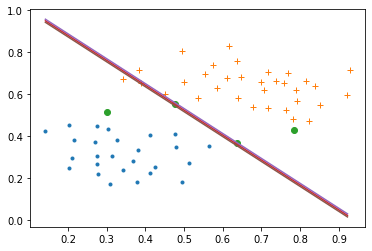

In [158]:
import matplotlib.pyplot as plt

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) if yi[data_idx] == 1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, ".")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) if yi[data_idx] == -1 for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, "+")

plot_x = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
plot_y = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(support_vectors) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 1])
print(plot_x)
print(plot_y)
plt.plot(plot_x, plot_y, "o")

plot_x = np.arange(np.min(data[:,0]), np.max(data[:,0]), 0.01)
plot_y = (-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plot_y = (1-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plot_y = (-1-w0-w1*plot_x)/w2
plt.plot(plot_x, plot_y)

plt.show()

In [159]:
x1 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
x2 = np.array([data_list[feat_idx] for data_idx, data_list in enumerate(x) for dim_idx, feat_idx in enumerate(data_list) if dim_idx == 0])
x = w1 * x1 + w2 * x2 + w0
print(x)

[ -92.21865642  -71.93012055  -70.13995562  -70.13995562  -69.54323398
  -39.70715182  -29.56288389  -38.51370854  -42.69076004  -55.22191454
  -62.9792959  -110.12030571  -89.83176984  -92.21865642  -60.59240933
   -4.50057488  -25.98255403  -50.4481414   -58.8022444   -61.78585262
  -88.04160491  -70.73667726   37.26994014    0.86991991   -9.27434802
  -10.46779131   15.78796099  -29.56288389   31.30272371   19.36829085
   30.10928042   58.15519765   73.66996037   76.65356858   61.13880586
   37.86666178   -5.09729652   12.80435277   21.75517742   38.46338343
   61.73552751  101.7158776    82.62078502   67.70274394   40.85027
   55.76831108   49.80109464   80.83062009   92.76505295   81.42734173
   75.4601253    83.8142283   122.00441346  124.39130003   90.37816638
   97.53882609   -3.30713159    7.43385798  -17.62845103  -10.46779131
  -36.72354361  -50.4481414   -37.91698689]


In [160]:
print(p_val)

[[2.5491793128882847], [3.281507873088355], [4.281332006939735], [4.816235397282011], [5.545734842152676], [5.439258557277878], [4.527598071560256], [3.153933714623271], [3.96109174931269], [2.816543251099109], [0.9999990626864736], [3.367873201296156], [4.872839991990624], [5.639732234865871], [6.057610403538206], [4.647364651599293], [4.031030517665712], [4.789347657592398], [3.9965984704310067], [2.191546257256647], [3.554749434358804], [2.1551403761753427], [0.9441619925003586], [3.1595919452821057], [2.2882411298588003], [1.364145630459749], [1.6056526243844225], [1.8827979748678878], [-5.845645920882969], [-4.210231977913846], [-3.5306042232093553], [-3.299646166079828], [-4.1538028971258605], [-4.93411707060584], [-4.674297439940087], [-4.893763521831357], [-4.640589038747766], [-3.379103075824556], [-2.5997758192678795], [-2.2623853557437137], [-2.132069838909498], [-3.239357174558986], [-3.8202284658544023], [-4.138451011154718], [-3.8019158291133586], [-3.8105786890222326], [